In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import glob
import os
import re

In [2]:
# fp is a list that will store each year's shot data in order
FG = glob.glob('Shot Data - CSV/Shot Data - *.csv')
YEARs = [re.findall(r'Shot Data - ((\d+)-\d+).csv', s)[0] for s in FG]

YEARs[0]

('1998-1999', '1998')

In [3]:
#loop through all years, adding each year's dataframe to the list
# now FG is a list of dataframes, length 23.
# Access each year in sequential order by indices 0 (1996 - 97) to 22 (2018 - 19).
FG = [pd.read_csv(fp, skiprows=1) for fp in FG]  # Skip first row, redundant information

In [4]:
YEARs[0][0]

'1998-1999'

In [5]:
for i in range(len(YEARs)):
    FG[i]['YEAR_SPAN'] = YEARs[i][0]  # Assign '1998-1999'
    FG[i]['YEAR'] = YEARs[i][1]  # Assign '1998'
    FG[i]['YEAR'] = FG[i]['YEAR'].astype(int)

In [6]:
df = pd.concat(FG, ignore_index=True)
# df = pd.concat(FG)
df

,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T,YEAR_SPAN,YEAR
0,Atlanta Hawks,771,1512,51.0,286,831,34.4,286,774,37.0,196,628,31.2,1998-1999,1998
1,Boston Celtics,947,1851,51.2,296,795,37.2,300,764,39.3,273,748,36.5,1998-1999,1998
2,Charlotte Hornets,782,1382,56.6,301,801,37.6,320,800,40.0,268,730,36.7,1998-1999,1998
3,Chicago Bulls,770,1541,50.0,254,809,31.4,338,876,38.6,177,605,29.3,1998-1999,1998
4,Cleveland Cavaliers,797,1589,50.2,281,689,40.8,301,748,40.2,182,527,34.5,1998-1999,1998
5,Dallas Mavericks,808,1504,53.7,344,905,38.0,396,1024,38.7,201,590,34.1,1998-1999,1998
6,Denver Nuggets,818,1566,52.2,269,730,36.8,295,777,38.0,299,911,32.8,1998-1999,1998
7,Detroit Pistons,812,1464,55.5,351,877,40.0,249,696,35.8,248,674,36.8,1998-1999,1998
8,Golden State Warriors,837,1743,48.0,328,861,38.1,405,1006,40.3,160,554,28.9,1998-1999,1998
9,Houston Rockets,952,1646,57.8,262,705,37.2,208,536,38.8,331,903,36.7,1998-1999,1998


In [7]:
# teams change names

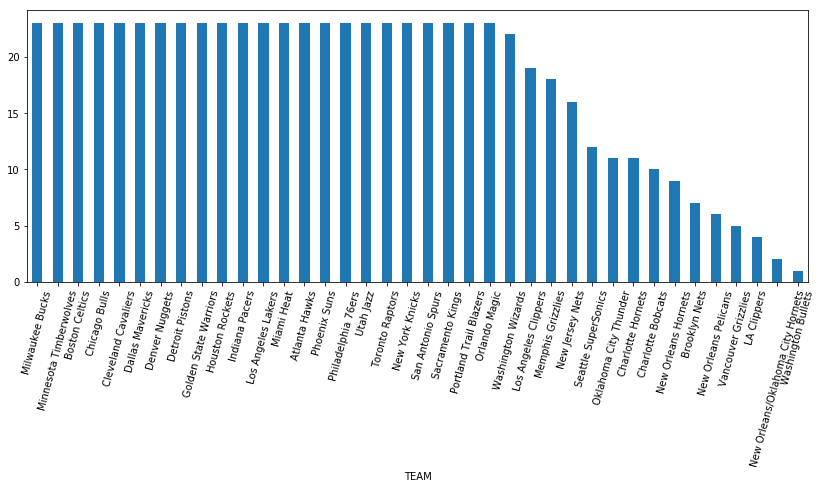

In [8]:
fig, ax = plt.subplots(0)
ax = df.groupby("TEAM")['YEAR'].nunique().sort_values(ascending=False).plot.bar(figsize=(14, 5))
plt.setp( ax.xaxis.get_majorticklabels(), rotation=75 )
plt.show()

In [24]:
def replace_team_name(name):
    if name == 'Seattle SuperSonics':
        return 'Oklahoma City Thunder'
    elif name == 'Charlotte Bobcats':
        return 'Charlotte Hornets'
    elif name == 'Vancouver Grizzlies':
        return 'Memphis Grizzlies'
    elif name == 'New Orleans Hornets':
        return 'New Orleans Pelicans'
    elif name == 'Washington Bullets':
        return 'Washington Wizards'
    elif name == 'Los Angeles Clippers':
        return 'LA Clippers'
    elif name == 'New Jersey Nets':
        return 'Brooklyn Nets'
    return name

In [25]:
df['TEAM'] = df['TEAM'].apply(replace_team_name)

In [26]:
df['TEAM'].unique()

array(['Atlanta Hawks', 'Boston Celtics', 'Charlotte Hornets',
       'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks',
       'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors',
       'Houston Rockets', 'Indiana Pacers', 'LA Clippers',
       'Los Angeles Lakers', 'Miami Heat', 'Milwaukee Bucks',
       'Minnesota Timberwolves', 'Brooklyn Nets', 'New York Knicks',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Oklahoma City Thunder', 'Toronto Raptors', 'Utah Jazz',
       'Memphis Grizzlies', 'Washington Wizards', 'New Orleans Pelicans',
       'New Orleans/Oklahoma City Hornets'], dtype=object)

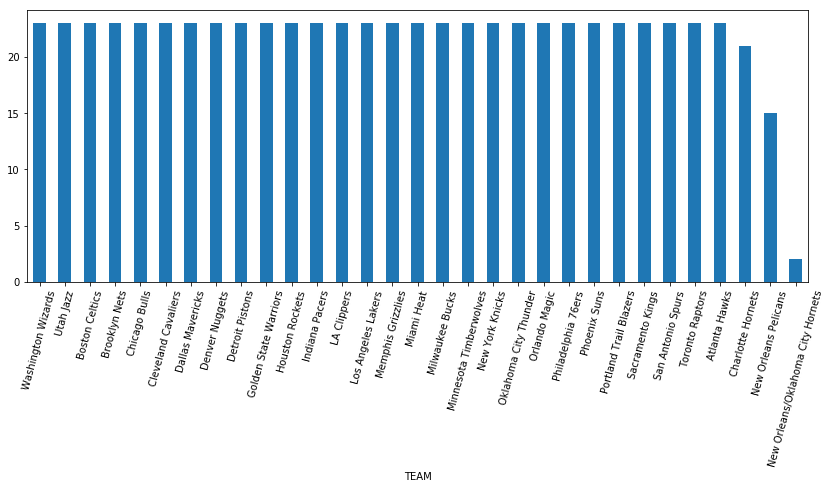

In [27]:
fig, ax = plt.subplots(0)
ax = df.groupby("TEAM")['YEAR'].nunique().sort_values(ascending=False).plot.bar(figsize=(14, 5))
plt.setp( ax.xaxis.get_majorticklabels(), rotation=75 )
plt.show()

In [35]:
def average_shooting_dist(s):
    sum_all_distances = 1 * s['FGA-C'] + 2 * s['FGA-M'] + 3 * s['FGA-L'] + 4 * s['FGA-T']
    num_of_attempts = s['FGA-C'] + s['FGA-M'] + s['FGA-L'] + s['FGA-T']
    return sum_all_distances / num_of_attempts

In [37]:
df['avg_shot_dist'] = df.apply(average_shooting_dist, axis=1)

In [12]:
df

,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T,YEAR_SPAN,YEAR
0,Atlanta Hawks,771,1512,51.0,286,831,34.4,286,774,37.0,196,628,31.2,1998-1999,1998
1,Boston Celtics,947,1851,51.2,296,795,37.2,300,764,39.3,273,748,36.5,1998-1999,1998
2,Charlotte Hornets,782,1382,56.6,301,801,37.6,320,800,40.0,268,730,36.7,1998-1999,1998
3,Chicago Bulls,770,1541,50.0,254,809,31.4,338,876,38.6,177,605,29.3,1998-1999,1998
4,Cleveland Cavaliers,797,1589,50.2,281,689,40.8,301,748,40.2,182,527,34.5,1998-1999,1998
5,Dallas Mavericks,808,1504,53.7,344,905,38.0,396,1024,38.7,201,590,34.1,1998-1999,1998
6,Denver Nuggets,818,1566,52.2,269,730,36.8,295,777,38.0,299,911,32.8,1998-1999,1998
7,Detroit Pistons,812,1464,55.5,351,877,40.0,249,696,35.8,248,674,36.8,1998-1999,1998
8,Golden State Warriors,837,1743,48.0,328,861,38.1,405,1006,40.3,160,554,28.9,1998-1999,1998
9,Houston Rockets,952,1646,57.8,262,705,37.2,208,536,38.8,331,903,36.7,1998-1999,1998


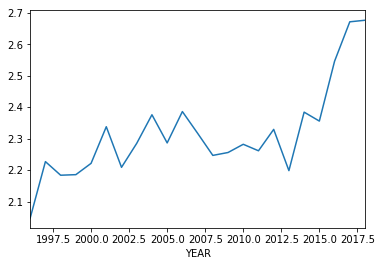

In [43]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['avg_shot_dist'])
a['Houston Rockets'].plot()

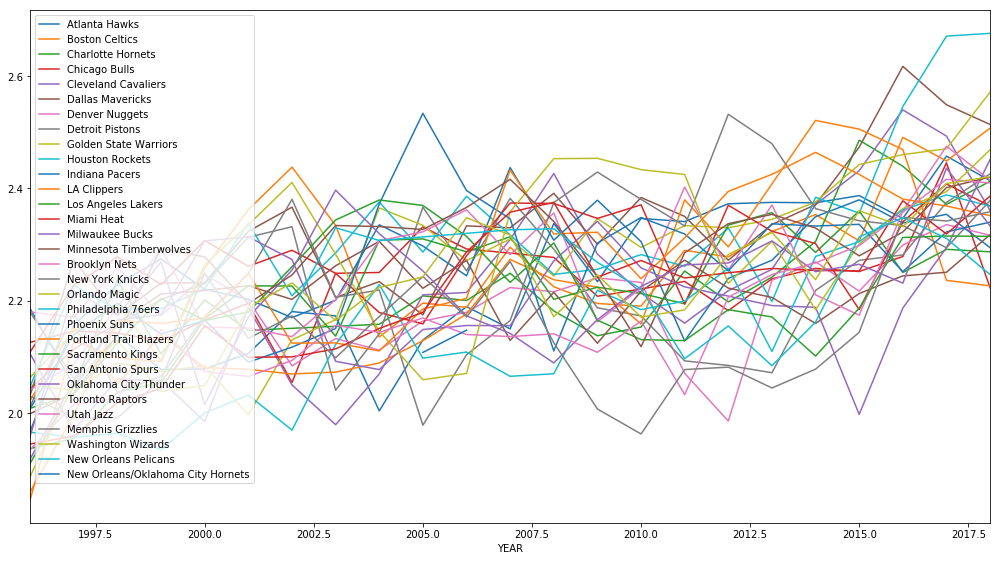

In [38]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['avg_shot_dist'])
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
#     if j == 20: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

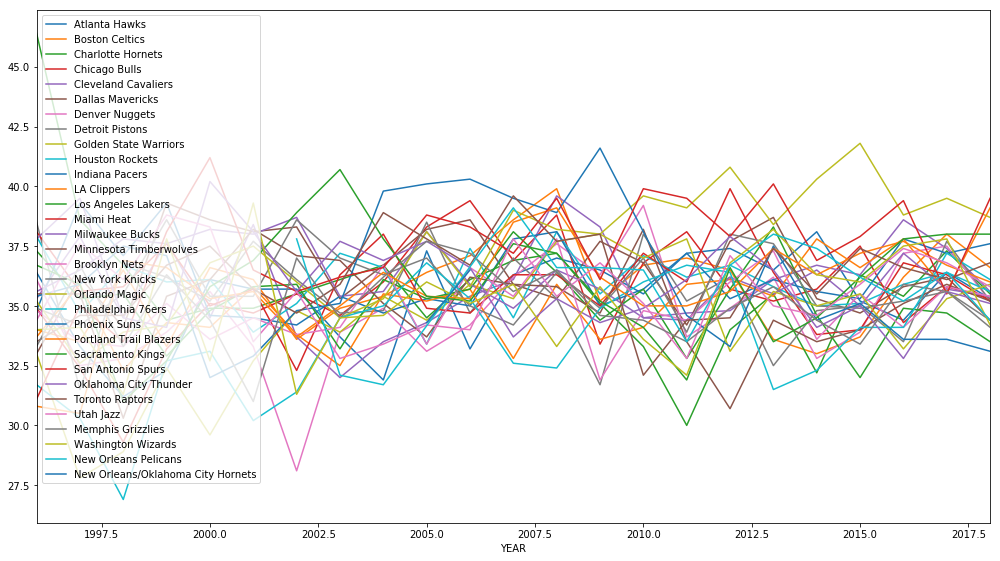

In [31]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['FG%-T'])

# fig, ax = plt.subplots(0)
# plt.
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
#     if j == 20: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

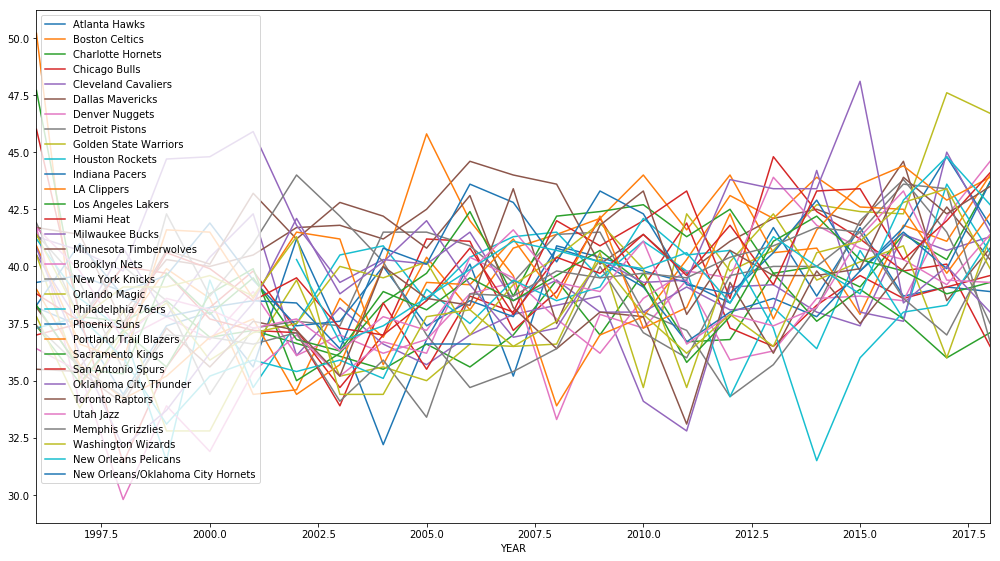

In [32]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['FG%-M'])

# fig, ax = plt.subplots(0)
# plt.
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
#     if j == 20: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

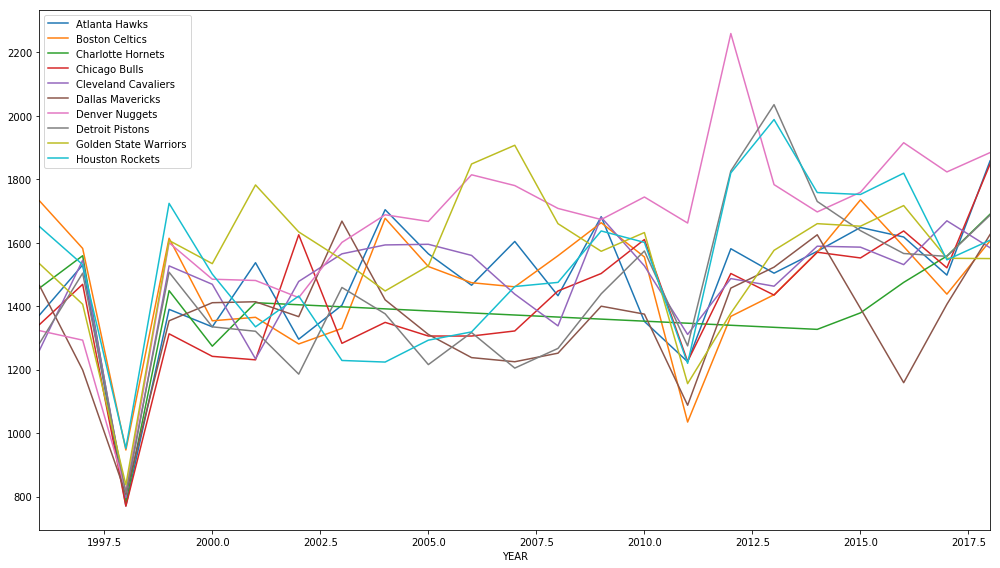

In [10]:
a = df.groupby('TEAM').apply(lambda df_: df_.set_index('YEAR', drop=True).sort_index()['FGM-C'])

# fig, ax = plt.subplots(0)
# plt.
j = 0
for team in df.TEAM.unique():
    a.loc[team].plot(figsize=(14,8), label=team)
    j += 1
    if j == 10: break

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
test2019 = pd.read_csv('Shot Data - CSV/Shot Data - 2018-2019.csv')

test2019.head()

,Unnamed: 0,LESS THAN 8FT.,Unnamed: 2,Unnamed: 3,8-16 FT.,Unnamed: 5,Unnamed: 6,16-24 FT.,Unnamed: 8,Unnamed: 9,24+ FT.,Unnamed: 11,Unnamed: 12
0,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T
1,Atlanta Hawks,1858,3275,56.7,334,859,38.9,136,359,37.9,1064,3010,35.3
2,Boston Celtics,1606,2687,59.8,484,1100,44,329,809,40.7,1032,2820,36.6
3,Brooklyn Nets,1773,3197,55.5,349,843,41.4,138,360,38.3,1040,2940,35.4
4,Charlotte Hornets,1690,3081,54.9,386,883,43.7,244,618,39.5,975,2743,35.5
